In [1]:
# # Loading the model

# In[1]:


from keras.models import load_model
from keras.models import model_from_json
#from  gtts import gTTS
from IPython import get_ipython

import os

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
language = 'en'

json_file = open('drive/My Drive/Colab Notebook/HCR-N/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('drive/My Drive/Colab Notebook/HCR-N/model1.h5')

model = loaded_model


print('Model successfully loaded')


Model successfully loaded


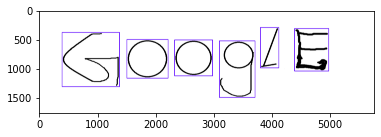

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('drive/My Drive/Colab Notebook/HCR-N2/example5.png')
height, width, depth = image.shape
#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):

    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    

plt.imshow(dp)


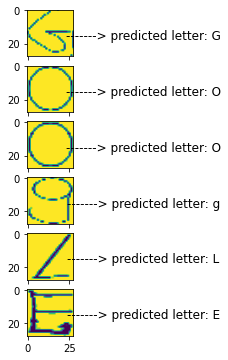

In [11]:
for i, ctr in enumerate(sorted_ctrs):
  
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    m.append(roi)
    pred = model.predict_classes(t)
    pchl.append(pred)
pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pchl)):
    #print (pchl[i][0])
    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


In [12]:
predstring = ''.join(pcw)
print('Predicted String: '+predstring)


Predicted String: GOOgLE


In [0]:
# !pip install pyttsx3
# !pip install gTTS

In [0]:
# from  gtts import gTTS
# myobj = gTTS(text=predstring, lang=language, slow=False)
# myobj.save("welcome.mp3")
# os.system("welcome.mp3")